In [ ]:
# Data Drift Impact on Model
# Question: Use a simple linear regression model to demonstrate how data drift affects model predictions.

# 1. Train a model on the original data:
# 2. Evaluate on the drifted data:
# 3. Compare errors:




Mean Squared Error on original training data: 0.992
Mean Squared Error on drifted test data: 1.056


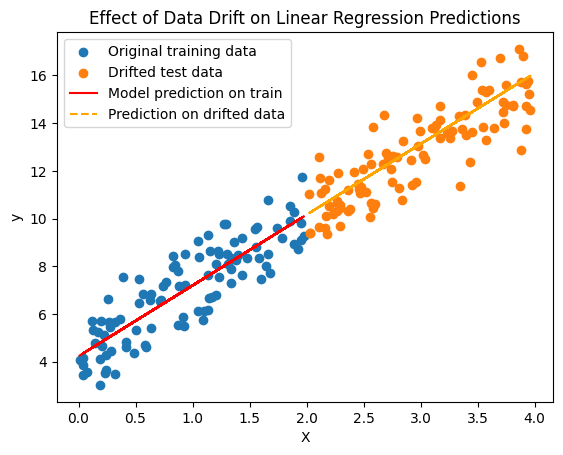

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Generate original training data
np.random.seed(0)
X_train = 2 * np.random.rand(100, 1)
y_train = 4 + 3 * X_train + np.random.randn(100, 1)

# 2. Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = model.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)

# 3. Generate drifted test data (shift input distribution by +2)
X_test_drifted = 2 * np.random.rand(100, 1) + 2  # shifted by +2
y_test_drifted = 4 + 3 * X_test_drifted + np.random.randn(100, 1)

# Predictions on drifted data
y_test_pred_drifted = model.predict(X_test_drifted)
drifted_error = mean_squared_error(y_test_drifted, y_test_pred_drifted)

# 4. Print and compare errors
print(f"Mean Squared Error on original training data: {train_error:.3f}")
print(f"Mean Squared Error on drifted test data: {drifted_error:.3f}")

# 5. Visualization
plt.scatter(X_train, y_train, label="Original training data")
plt.scatter(X_test_drifted, y_test_drifted, label="Drifted test data")
plt.plot(X_train, y_train_pred, color='red', label="Model prediction on train")
plt.plot(X_test_drifted, y_test_pred_drifted, color='orange', linestyle='dashed', label="Prediction on drifted data")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Effect of Data Drift on Linear Regression Predictions")
plt.show()


In [ ]:
# Monitoring Data Distribution Changes
# Question: Use Python to monitor distribution changes in features to detect potential data drift.

# 1. Calculate feature statistics (mean and standard deviation) for both original and drifted data:
# 2. Compare statistics:
# 3. Set thresholds to detect significant drift:




In [2]:
import numpy as np

# 1. Generate original data and drifted data (similar to previous example)
np.random.seed(0)
X_original = 2 * np.random.rand(100, 1)
X_drifted = 2 * np.random.rand(100, 1) + 2  # Shift by +2, simulating drift

# 1. Calculate feature statistics (mean and std) for both datasets
mean_original = np.mean(X_original, axis=0)
std_original = np.std(X_original, axis=0)

mean_drifted = np.mean(X_drifted, axis=0)
std_drifted = np.std(X_drifted, axis=0)

print("Original Data - Mean:", mean_original, "Std Dev:", std_original)
print("Drifted Data  - Mean:", mean_drifted, "Std Dev:", std_drifted)

# 2. Compare statistics
mean_diff = np.abs(mean_drifted - mean_original)
std_diff = np.abs(std_drifted - std_original)

print("Difference in Means:", mean_diff)
print("Difference in Std Devs:", std_diff)

# 3. Set thresholds to detect significant drift (example thresholds)
mean_threshold = 0.5
std_threshold = 0.5

drift_detected = (mean_diff > mean_threshold) | (std_diff > std_threshold)

if drift_detected.any():
    print("Data drift detected!")
else:
    print("No significant data drift detected.")


Original Data - Mean: [0.94558768] Std Dev: [0.57660321]
Drifted Data  - Mean: [3.05616351] Std Dev: [0.55341796]
Difference in Means: [2.11057583]
Difference in Std Devs: [0.02318525]
Data drift detected!


In [ ]:
# Automating Data Quality Checks with Python
# Question: Automate a basic data validation process using Python to ensure the dataset's
# structural integrity.

# 1. Define validation checks:
# 2. Apply validation:




In [3]:
import pandas as pd

# Sample data (you can replace this with loading your actual dataset)
data = {
    'id': [1, 2, 3, 4, 4],
    'age': [25, 30, None, 22, 22],
    'income': [50000, 60000, 55000, 45000, 45000],
    'signup_date': ['2023-01-01', '2023-01-05', '2023-01-07', '2023-01-10', '2023-01-10']
}

df = pd.DataFrame(data)

# 1. Define expected schema: column names and their data types
expected_columns = {
    'id': int,
    'age': float,
    'income': float,
    'signup_date': object  # can also use pd.Timestamp if parsed
}

# Validation functions
def check_missing_values(df):
    missing = df.isnull().sum()
    print("Missing Values per Column:\n", missing)
    return missing

def check_data_types(df, expected_schema):
    dtype_issues = {}
    for col, expected_dtype in expected_schema.items():
        if col in df.columns:
            # Check if dtype matches expected dtype
            if not pd.api.types.is_dtype_equal(df[col].dtype, expected_dtype):
                dtype_issues[col] = (df[col].dtype, expected_dtype)
        else:
            print(f"Missing expected column: {col}")
    return dtype_issues

def check_duplicates(df):
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")
    return duplicate_count

def check_unexpected_columns(df, expected_columns):
    unexpected_cols = set(df.columns) - set(expected_columns.keys())
    if unexpected_cols:
        print("Unexpected columns found:", unexpected_cols)
    else:
        print("No unexpected columns found.")
    return unexpected_cols

# 2. Apply validations
print("\n--- Data Quality Checks ---")
check_missing_values(df)

dtype_issues = check_data_types(df, expected_columns)
if dtype_issues:
    print("Data type mismatches found:")
    for col, (found, expected) in dtype_issues.items():
        print(f" - Column '{col}': found {found}, expected {expected}")
else:
    print("All data types match expected schema.")

check_duplicates(df)
check_unexpected_columns(df, expected_columns)



--- Data Quality Checks ---
Missing Values per Column:
 id             0
age            1
income         0
signup_date    0
dtype: int64
Data type mismatches found:
 - Column 'income': found int64, expected <class 'float'>
Number of duplicate rows: 1
No unexpected columns found.


set()

In [ ]:
# Introducing Great Expectations for Data Validation
# Question: Use Great Expectations to set up data validation checks for a dataset.

# 1. Install Great Expectations:
# 2. Create a new expectations suite:
# 3. Load data and generate expectations:




In [4]:
!pip install great_expectations

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import great_expectations as ge

# Initialize a Data Context (optional for small scripts, but good practice)
from great_expectations.data_context import DataContext
context = DataContext()

# Create a new expectations suite called "my_suite"
suite = context.create_expectation_suite(expectation_suite_name="my_suite", overwrite_existing=True)
print("Created Expectations Suite:", suite.expectation_suite_name)


ImportError: cannot import name 'DataContext' from 'great_expectations.data_context' (/home/vscode/.local/lib/python3.10/site-packages/great_expectations/data_context/__init__.py)

In [6]:
import pandas as pd
import great_expectations as ge

# Sample data
data = {
    'id': [1, 2, 3, 4],
    'age': [25, 30, 22, 22],
    'income': [50000, 60000, 55000, 45000]
}
df = pd.DataFrame(data)

# Convert to Great Expectations DataFrame
ge_df = ge.from_pandas(df)

# Create expectation suite or load existing suite
# (For simplicity, we create a new suite here)
ge_df.expect_table_row_count_to_be_between(min_value=3, max_value=10)
ge_df.expect_column_values_to_not_be_null('age')
ge_df.expect_column_values_to_be_between('age', min_value=18, max_value=65)
ge_df.expect_column_values_to_be_of_type('income', 'int64')

# Validate data and get results
results = ge_df.validate()
print(results)


AttributeError: module 'great_expectations' has no attribute 'from_pandas'

In [ ]:
# Automating Constraint Checks with Python
# Question: Automate primary key and foreign key constraint checks using Python to ensure dataset compliance.


# 1. Assuming datasets exist with primary and foreign key relationships in pandas dataframes employees_df and departments_df :




In [7]:
import pandas as pd

# Sample data

departments_df = pd.DataFrame({
    'department_id': [1, 2, 3],
    'department_name': ['HR', 'Engineering', 'Sales']
})

employees_df = pd.DataFrame({
    'employee_id': [101, 102, 103, 104],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David'],
    'department_id': [1, 2, 2, 4]  # Note: '4' does NOT exist in departments_df
})

# 1. Primary Key Check: Ensure department_id is unique in departments_df

def check_primary_key(df, key_column):
    duplicates = df[df.duplicated(subset=[key_column], keep=False)]
    if duplicates.empty:
        print(f"Primary Key check PASSED: '{key_column}' is unique.")
    else:
        print(f"Primary Key check FAILED: Duplicates found in '{key_column}':")
        print(duplicates)

check_primary_key(departments_df, 'department_id')

# 2. Foreign Key Check: Ensure all employees' department_id exist in departments_df

def check_foreign_key(child_df, child_col, parent_df, parent_col):
    invalid_fk = child_df[~child_df[child_col].isin(parent_df[parent_col])]
    if invalid_fk.empty:
        print(f"Foreign Key check PASSED: All values in '{child_col}' exist in parent '{parent_col}'.")
    else:
        print(f"Foreign Key check FAILED: Invalid foreign keys found in '{child_col}':")
        print(invalid_fk)

check_foreign_key(employees_df, 'department_id', departments_df, 'department_id')


Primary Key check PASSED: 'department_id' is unique.
Foreign Key check FAILED: Invalid foreign keys found in 'department_id':
   employee_id employee_name  department_id
3          104         David              4


In [ ]:
# Advanced Data Drift Detection using Statistical Tests
# Question: Implement Kolmogorov-Smirnov test using Python to detect data drift at a more sophisticated level.

# 1. Use SciPy to perform KS test:




In [8]:
import numpy as np
from scipy.stats import ks_2samp

# 1. Generate sample data: original and drifted

np.random.seed(42)
original_data = np.random.normal(loc=0, scale=1, size=1000)
drifted_data = np.random.normal(loc=0.5, scale=1.2, size=1000)  # shifted mean and variance

# 2. Perform KS test

ks_statistic, p_value = ks_2samp(original_data, drifted_data)

print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Interpret result
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis - Data drift detected!")
else:
    print("Fail to reject null hypothesis - No significant drift detected.")


KS Statistic: 0.2310
P-value: 0.0000
Reject null hypothesis - Data drift detected!
